# Lecture 4: Linear Algebra and Linear Regression

## 24 October 2020

### Table of Contents
* [Linear Algebra](#linear_algebra)  
    * [Motivation](#motivation)  
    * [Notation](#notation)  
    * [Matrix Terminology](#terminology) 
    * [Matrix Operations](#operation) 
        * [Transpose](#transpose)
        * [Addition & Subtraction](#addsub)
        * [Scalar Multiplication](#scalar_mul)
        * [Matrix Multiplication](#matrix_mul)
    * [Linear Independence](#linear_independence) 
    * [Invertibility](#invert) 
    * [Matrix Operations in numpy](#Matrix-Operations-in-numpy)
        * [Scalar Multiplication](#Scaler-Multiplication)
        * [Matrix Multiplication](#Matrix-Multiplication)
        * [Matrix Inverse](#Matrix-Inverse) 
        * [Matrix Linear Independence](#Matrix-Linear-Independence) 
        * [Matrix Transpose](#Matrix-Transpose)

* [Regression](#regression)
    * [Introduction](#intro)
        * [What Is A Model?](#what_model)
        * [Why Make A Model?](#why_model)
    * [Linear Regression](#linear_regression)
        * [Simple Linear Regression](#simple)
        * [Model Assumptions](#assumptions)
        * [Introduction to Least Square Error](#loss)
        * [Minimizing the Error](#ols)
        * [Making the Model](#making_model)
        * [Interpreting the Model](#interpreting_model)
        * [Assessing the Model](#assessment)
            * [Coefficient of Determination ($R^2$)](#r_squared)
            * [Residual Plots](#residual_plots)
            * [Q-Q Plots](#qq_plots)
        * [When Can I Use A Linear Model?](#when_to_use)


### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://susa.berkeley.edu).
Presented by [Caroline Chen](mailto:carolinejchen@berkeley.edu) and [Ronnie Ghose](mailto:shomirog@berkeley.edu)

<a id='linear_algebra'></a>
# Linear Algebra

<img src="https://economics.uwo.ca/math/resources/test-yourself-matrix-algebra/images/Matrix.png"/>


<a id='motivation'></a>
## Motivation
Linear algebra is the study of vector spaces, and it encompasses linear equations and functions represented by vector spaces and matrices.
Vectors and matrices are essential for storing data, which is why we often use Python packages such as Numpy and Pandas.
A common problem is linear regression, which we will delve into solving using matrices and linear algebra.


<a id='Example'></a>
## Example
<img src='https://www.scdn.co/i/_global/open-graph-default.png' width='500px' />
Spotify vectorizes their songs in order to find things that you might like. They can find the distance between some of your favorite songs and other songs by artists you haven't listened to before in order to help you discover new artists and songs.

<a id='notation'></a>
## Notation
Common notation:

* $\mathbf{A}$: Bold capital letters represent matrices
* $\mathbf{x}$: Bold lowercase letters represent vectors
* $\theta$: Non-bold values represent scalars

<a id='terminology'></a>
## Matrix Terminology
* **Identity** matrix: A square matrix with diagonal elements equal to $1$ and all off diagonal elements equal to zero. A $n\times n$ identity matrix is often denoted as $I$ or $I_n$.
* **Order or Size** of matrix: If a matrix has m rows and n columns, the order of the matrix is $m\times n$. We denote the set of (real-valued) matrices $\mathbb{M}_{m,n}$
* **Transpose** of a matrix: The transpose of matrix $\mathbf{A}$ satisfies the condition $\mathbf{A_{j,i}} = \mathbf{A_{i,j}}^T$. That is, the first row of $\mathbf{A}$ is the first column of $\mathbf{A}^T$.
* **Square** matrix: A matrix with the same number of rows as columns. This matrix is in the shape of a square.
* **Diagonal** matrix: A matrix with all the non-diagonal elements equal to $0$ is called a diagonal matrix.
* **Scalar** matrix: An identity matrix multiplied by a constant.
* **Column** matrix: A matrix which consists of exactly $1$ column. If it has $m$ rows, it can be treated as a $m\times 1$ vector. 
* **Row** matrix: A matrix which consists of exactly $1$ row. If it has $n$ columns, it can be treated as a $1\times n$ vector. 
* **Determinant**: A scalar value that can be computed from the elements of a square matrix and encodes certain properties of the linear transformation described by the matrix.
* **Rank**: The maximal number of linearly independent columns of a matrix.


<a id='linear_independence'></a>
## Linear Independence
What does it mean for a set of vectors to be **linearly independent**? It is easier to define what it means to be linearly dependent. A set of vectors $$\mathbf{x_1, x_2, ..., x_n}$$ is linearly dependent if there exist scalars ${\alpha_1, \alpha_2, ..., \alpha_n}$, not all equal to 0 such that $$\sum_{i=1}^n \alpha_ix_i = 0.$$
In words, this means that there exists at least one vector that can be written as a linear combination of the remaining vectors.


<img src="https://thejuniverse.org/PUBLIC/LinearAlgebra/LOLA/indep/linIndep.png">


<a id='invert'></a>
## Invertibility
The inverse of an $n\times n$ matrix $\mathbf{A}$, denoted as $\mathbf{A}^{-1}$, satisfies the following properties:

$$\mathbf{A A}^{-1} = I_{n\times n},\ \mathbf{A}^{-1} \mathbf{A}=I_{n\times n}.$$
We may consider a concrete example with a $2\times 2$ matrix. 
$$\mathbf{A} = \begin{bmatrix} a & b\\ c & d\end{bmatrix}$$
$$\mathbf{A}^{-1} = (\det \mathbf{A})^{-1}\begin{bmatrix} d & -b\\ -c & a\end{bmatrix} = \frac{1}{ad-bc} \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}$$

For inverting matrices of higher dimensions, the calculation is much more difficult. We will often want to use a computer to compute these for us. But why do we care about inverse matrices in the first place? Why do they come up in linear regression?

The answer to this will show up toward the end of this lecture when we consider the normal equations.

Remember for later: If a matrix $\mathbf{A}$ is invertible, so is its transpose, and the inverse of $\mathbf{A}^T$ is the transpose of the inverse of $\mathbf{A}$: $(\mathbf{A}^T)^{-1} = (\mathbf{A}^{-1})^T$.

![Picture title](image-20201023-205947.png)


<a id='operation'></a>
## Matrix Operations

Several of the important things that we are going to go over how to code include scalar multiplication, matrix multiplication, matrix inverses, and matrix transposing.

In [1]:
# First, let's import some useful libraries 
import numpy as np 

In [2]:
# First, let's declare a couple of matrices to play with 

A = np.array([[-24, -18, 5],
              [20, -15, -4],
              [-5, 4, 1]])

B = np.array([[16, -3, -8], 
              [-10, 15, 4],
              [-9, 4, 1]])



<a id='addsub'></a>
### Addition & Subtraction
if $\mathbf{A}$ and $\mathbf{B}$ are both $m \times n$, we form $\mathbf{A} + \mathbf{B}$ by adding corresponding entries. $$\mathbf{A} = \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix}, \mathbf{B} = \begin{bmatrix} b_1 & b_2\\ b_3 & b_4 \end{bmatrix}, \mathbf{A} + \mathbf{B} = \begin{bmatrix} a_1+b_1 & a_2+b_2\\ a_3+b_3 & a_4+b_4 \end{bmatrix}$$ A fact about matrix addition and transpose is that $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$.

Similarly, we can perform subtraction in the same way, where we form $\mathbf{A} - \mathbf{B}$ by subtracting entries of $\mathbf{B}$ from corresponding entries of $\mathbf{A}$.

Note that we can only perform matrix addition and subtraction when both matrices in the operation have the same dimension.

In [3]:
# Addition
print(A + B)

# Subtraction
print(A - B)

[[ -8 -21  -3]
 [ 10   0   0]
 [-14   8   2]]
[[-40 -15  13]
 [ 30 -30  -8]
 [  4   0   0]]


### Scalar Multiplication


<a id='scalar_mul'></a>
### Scalar Multiplication
We can multiply a scalar (a.k.a. number) by a matrix by multiplying every entry of the matrix by the scalar. This is denoted $\cdot$ between the scalar and the matrix. $$c \cdot \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix} = \begin{bmatrix} c\times a_1 & c\times a_2\\ c\times a_3 & c\times a_4 \end{bmatrix}$$

First, let's do an example of scalar multiplication. It works just like normal multiplication. 

In [4]:
# Replace this example with multiplying one the matrices by a scalar 

5 * A

array([[-120,  -90,   25],
       [ 100,  -75,  -20],
       [ -25,   20,    5]])

### Matrix Multiplication 

<a id='matrix_mul'></a>
### Matrix Multiplication
If $\mathbf{A}$ is $m \times p$ and $\mathbf{B}$ is $p \times n$, we can form $\mathbf{C} = \mathbf{A}\mathbf{B}$, which has dimension $m \times n$. For matrix multiplication to occur, the number of columns of $\mathbf{A}$ has to equal the number of rows of $\mathbf{B}$. A fact about matrix multiplication and transpose is that $(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T\mathbf{A}^T$.$$\begin{bmatrix} a_{11} & a_{12} & a_{13}\\ a_{21} & a_{22} & a_{23} \end{bmatrix}\begin{bmatrix} b_{11} & b_{12}\\ b_{21} & b_{22} \\ b_{31} & b_{32} \end{bmatrix} = \begin{bmatrix} \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot2}}\\ \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot2}} \end{bmatrix}$$ where $\mathbf{a_{i\cdot}}$ is the $i$th row of matrix $\mathbf{A}$ and $\mathbf{b_{\cdot j}}$ is the $j$th column of matrix $\mathbf{B}.$

For matrix multiplication, in general we don't have $\mathbf{A}\mathbf{B} = \mathbf{B}\mathbf{A}$.

Next, write down matrix multiplication. Unfortunately, it is slightly different from scalar multiplication

In [5]:
# Product of A and B
AB = np.dot(A, B)
print(AB)

# Next, try out the product of B and A. Remember, order matters! 
BA = np.dot(B, A)
print(BA)

[[-249 -178  125]
 [ 506 -301 -224]
 [-129   79   57]]
[[-404 -275   84]
 [ 520  -29 -106]
 [ 291  106  -60]]


### Matrix Inverse
Now we are going to try out inverses. We are going to be using some linear algebra functions from the numpy function. 

These functions are accessed by calling numpy.linalg 


In [11]:
#Try to find the inverse of matrix A. Notice how easy this is compared to doing it by hand

inv = np.linalg.inv(A)
print(inv)


# Observe how the results are not exact. Sometimes there are rounding errors when the computer is calculating 
# the inverse of a matrix. This can resolved by rounding (you can use np.matrix.round(yourMatrixHere)) or simply 
# ignored since it is such a small error. 
print(np.round(inv))

print(np.round(np.dot(A, inv)))

[[ 1.00000000e+00  3.80000000e+01  1.47000000e+02]
 [-9.62193288e-17  1.00000000e+00  4.00000000e+00]
 [ 5.00000000e+00  1.86000000e+02  7.20000000e+02]]
[[  1.  38. 147.]
 [ -0.   1.   4.]
 [  5. 186. 720.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]


### Matrix Linear Independence 

However, as we learned earlier, not all matricies are invertible. How can we tell if a matrix is invertible or not? 

In [12]:
# If a matrix's determinant is 0, it is not invertible

if np.linalg.det(A) == 0:
    print("Matrix is not invertible")
else:
    print("Matrix is invertible")


Matrix is invertible


### Matrix Transpose 


<a id='transpose'></a>
### Transpose
Transpose converts row vectors into column vectors, and vice versa. For example, for a $3 \times 2$ matrix $\mathbf{A}$ where $$ \mathbf{A} = \begin{bmatrix} 0 & 4\\ 7 & 0 \\ 3 & 1\end{bmatrix}, \mathbf{A}^T = \begin{bmatrix} 0 & 7 & 3\\ 4 & 0 & 1\end{bmatrix}$$ 

Note that $$(\mathbf{A}^T)^T = \mathbf{A}$$

Lastly, let's try to find the transpose of a matrix 

In [13]:
# Let's transpose that matrix!!! 
A.transpose()


array([[-24,  20,  -5],
       [-18, -15,   4],
       [  5,  -4,   1]])

<a id='regression'></a>
# Regression

<a id='intro'></a>
## Introduction
Your boss is willing to do anything to get into the new hype train of *_big data_* and asks you to use your super duper important data science skills to see if there is any proof that cars that travel faster tend to cover more distance. Your boss gives you a bunch of data involving the speed of a car as well as the distance traveled by a car and it is your job to find some association. (Don't worry, at least you are getting paid well for this.)

<a id='what_model'></a>
### What Is A Model?
A model is a simplification of the real world. We would like the make a prediction for what the real world is actually like by attempting to "fit" a model to the data. 

Below are a few (3) attempts to generalize the data into a line of the form `y = a + bx`

<img src='scatterAndLines.png' width=400 />


<a id='why_model'></a>
### Why Make A Model?
We often find that in the real world, many problems can be (accurately) described by models created by you, the data scientist. You can make a model as an attempt to describe the relationship between many related things, such as the year a computer was made as well as how much memory it can hold. With enough data, you can begin to make predictions such as how much memory a computer may hold in 5 years (hence, the create of [Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law))

However, it is important to keep in mind what you are analyzing. Just because you can make a model describing the relationship between two variables, and even if you can use this model to predict the value of one variable based on the value of the other, it doesn't mean that one causes the other. You may have heard this before as the difference between **correlation** and **causation**. A classic example is the relationship between ice cream sales and murder rates. Turns out, when ice cream sales rise, so do murder rates. Does this mean ice cream *causes* people to commit murder? Or get murdered? Nope!

Today, we're going to learn how to make a **linear** model to describe the relationship between variables.

<a id='linear_regression'></a>
## Linear Regression
**Linear regression** is a method of making linear models. Linear model is one kind of model, in which the relationship between the explanatory variables and the response variable can be described by a linear function. For now, you can just think of a linear function as a straight line, which takes us to *simple linear regression*.

<a id='simple'></a>
### Simple Linear Regression
**Simple linear regression** is a special case of linear regression in which you only have one explanatory variable. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks! 

$$y = \theta_0 + \theta_1x$$

Here, $y$ is the **response** or **dependent** variable we're trying to predict, and $x$ is an **explanatory** or **independent** variable used to predict $y$. For example, when you're trying to predict your friend's weight, $y$ would represent weight, while $x$ represents height.

Using known $x$'s, we want to accurately predict $y$ using the right $\hat{\theta_0}$ and $\hat{\theta_1}$. Note that here we're putting a hat on the $\theta$'s: this is because the data sample $y_i$ we have will not be perfect (with error terms). Here, the data points we have will have some unobserved deviations from the model function above, and we model this deviation using $\epsilon_i$. Hence, the data points we have follow

$$y_i = \theta_0 + \theta_1x + \epsilon_i$$

\*\* I know that seeing $\theta$'s everywhere can be quiet scary. It is helpful to keep in mind that these variables are constants and can be replaced with any other variable in the alphabet that makes you comfortable, such as a and b.

<a id='assumptions'></a>
### Model Assumptions
Before we go into details about linear regression, let's take a look at the keys assumptions made in linear modeling.
* **Linearity**: The relationship between the features and response variables is linear
* **Homoscedasticity**: The variance of the error terms is the same for all values of the explanatory variables

<img src='hetero.png' width=400 />

* **Independence**: The features are linearly independent (The feature matrix has full rank)
* **Normality**: The error terms follow a normal distribution 
* **Multicollinearity**: Two or more independent variables are highly linearly related.

Combining homoscedasticity and normality, we have 
$$\forall i, \epsilon_i \sim N(0, \sigma^2)$$

<a id='loss'></a>
### Introduction to Least Squared Error 

In the previous examples, all of the provided lines were examples of attempts to model the data. The question comes to mind: "How do we numerically decide which line is the best line?" As it turns out, there are many different methods that can be used to measure "how bad" each line is. (For those interested, it is known as a "Loss Function," and more about it can be read [here](https://en.wikipedia.org/wiki/Loss_function).)

The loss function that we will be teaching here is known as "least square error." The general spirit of this method is that if we have a bunch of predicted values, $\hat{y_1}, \hat{y_2} .. \hat{y_n}$ and a bunch of real values, $y_1, y_2 ... y_n$, we can generate a heuristic by calculating (incoming SUPER important equation) 
$$\sum_{i = 1}^{n} \big( y_{i} - \hat{y_i} \big)^{2}$$

If you remember, $\hat{y_i}$ is our prediction, which can otherwise be expressed as $\theta_0 + \theta_1 x_i$. By substituting in the expression, we get 

$$\sum_{i = 1}^{n} \big( y_{i} - ( \theta_0 + \theta_1 x_i) \big)^{2}$$

It's great to see that we have a method of measuring how good (or bad) linear model is (by the expression above), but how do we find _the best_ model? 

In order to find the best model, we need to find some value for $\theta_0$ and $\theta_1$ that minimizes the expression above. 


<img src='simple_linear.png' width=400 />

<img src='https://www.mathsisfun.com/data/images/least-squares2.svg' />


<a id='ols'></a>
### Minimizing the Error
Our goal is to minimize the **sum of squared residual** or the  sum of the squared difference between the predicted value and the observed value for a given $x$.

Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - \theta_0-\theta_1x_i)^2$$

By minimizing this function, we can solve for slope $\theta_1$ and the intercept $\theta_0$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus. Since calculus is a bit harder to do on the computer (it is possible!), so we'll be doing this part on paper! If you would like an online reference, feel free to click [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $\theta_1$ and $\theta_0$ can be solved as:

$$
\begin{aligned}
\hat{\theta_0}&=\bar {y}-\hat{\theta_1}\,{\bar{x}},\\
\hat{\theta_1}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}
$$

This is a lot to digest all at once. While you do not need to memorize the proof in order to make a linear model, it is useful to understand the math behind them when you wish to understand more complicated models. [Here](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf) is a useful reference. 

<a id='making_model'></a>
### Making the Model
In linear regression, the response variable is usually continuous. The explanatory variables *can* be discrete and even categorical, but for simple linear regression they are usually continuous. For today we'll just be working with continuous variables! 

Let's work with the `mpg` dataset and decide whether it's appropriate for making a simple linear regression model.

In [19]:
#Some useful imports 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression
from scipy.optimize import curve_fit

In [20]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove rows with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in next lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 


*Hint:* Hitting `shift-tab` with the cursor on the name of a function will bring up helpful documentation about how to use the function

Since we are looking at the data for cars, what could be a useful variable to predict?
Furthermore, to predict this variable, what explanatory or response variable should we use?

In [21]:
x1 = mpg_train["displacement"]
y1 = mpg_train["mpg"]

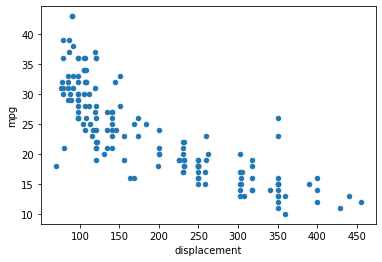

In [22]:
mpg_train.plot.scatter('displacement', 'mpg')

`sklearn`'s `linear_model` module makes it really easy to make linear models! There's a lot of different types of linear models implemented in the `linear_model` module, which you can take a look at [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) if you're interested, but for today we'll be using `LinearRegression`, which we've imported for you in the cell below. Try reading the documentation to figure out what the `fit()` function expects as input to correctly fit our model to the `mpg_train` data!

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = mpg_train[["displacement"]]
y = mpg_train[["mpg"]]

# Fit the model to the data
linear_model.fit(X, y)

LinearRegression()

Once you've got it working you'll notice that it seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [26]:
linear_model.coef_, linear_model.intercept_

(array([[-0.06129822]]), array([35.20358341]))

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've provided the skeleton for a helper function called `overlay_simple_linear_model`. Try to fill out the function so that it plots a scatterplot with the linear model overlaid on top.

*Hint:* If you press `tab` after a `[object].` or `[package].`, Jupyter will show you a list of valid functions defined for that object type or package.

In [28]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x)
    
    
    data.plot.scatter(x_name, y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(y)
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

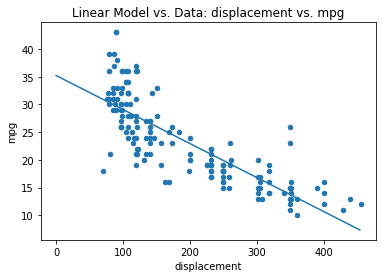

In [30]:
# If you wrote the function above correctly, the output should look like this
overlay_simple_linear_model(mpg_train, 'displacement', "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanatory variable?

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is?
If you've taken AP Stats or Data 8, you might have heard that the **correlation coefficient**, $R$, 
tells us how strong of an association two variables have. Values close to -1 or 1 have a strong association.
We are going to talk about another way of measuring how well your model fits the data is the $R^2$ coefficient,
or the **coefficient of determination**. Basically, what the $R^2$ represents is how much our data can vary but
still be predicted accurately by the explanatory variable. $$R^2 = 1- \frac{\sum_{i}e_i^2}{\sum_{i}(y_i-\bar{y})^2}$$
Intuitively, $R^2$ measures how much better our fitted model is doing compared to the most basic model where we
predict $\hat{y}_i = \bar{y}$ for every data point.

<img src='https://i.imgur.com/URDr1oW.png' />

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [31]:
linear_model.score(X, y) # you'll only need to use variables that we've already defined

0.6600146627660186

Woohoo! If you used `displacement`, our model accurately predicts 66% of the variation in `mpg`. In practice, $R^2$ is almost always between 0 and 1, although it is possible for $R^2$ to take on a negative value when your model is worse than the baseline model $\hat{y}_i = \bar{y}$.

**Question:** What does it mean for $R^2$ to have a value of 1? What about 0?


**Exercise:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [33]:
linear_model2 = LinearRegression()

X2 = mpg_train[["mpg"]]

linear_model2.fit(X2, y)

r_squared = linear_model2.score(X2, y)

r_squared

1.0

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. 

Fill in the blanks in the `plot_simple_residuals()` function, so we can take a look at the residual plot.



<img src='https://www.qualtrics.com/support/wp-content/uploads/2017/07/Screen-Shot-2017-07-19-at-9.46.11-AM.png' width='800px' />


In [40]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X = data[[x_name]]
    y = data[[y_name]]
    residuals = y - linear_model.predict(X)
    
    plt.scatter(y, residuals) # plot residuals
    plt.axhline(y=0, color='r', linestyle='-') # plots line at y = 0
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

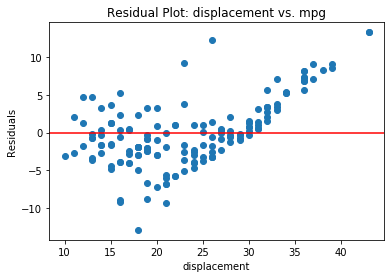

In [41]:
plot_simple_residuals(mpg_train, "displacement", 'mpg', linear_model)

As you can see, the residuals aren't scattered randomly around the y-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='qq_plots'></a>
#### Q-Q Plots
A **Q-Q plot** (quantile-quantile plot) is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Quantiles split up a distribution into equal-sized subgroups. For example, a median splits a distribution into 2 equl areas, so it is called a 2-quantile. You can read more about quantiles [here](https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html).

Here's an example of a Normal Q-Q plot when both sets of quantiles truly come from standard normal distributions.

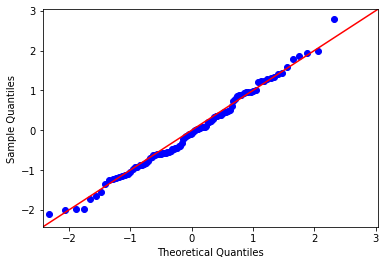

In [42]:
import statsmodels.api as sm
from scipy import stats
nsample = 100
np.random.seed(134)
x = stats.norm.rvs(loc=0, scale=1, size=nsample) # generating 100 data points from a standard normal distribution
fig = sm.qqplot(x, line = '45') # plot the theoretical line where all points should be close to
plt.show()

Q-Q plot is very useful for checking the normality assumption of linear regression: by plotting the distribution of the data at hand against the distribution of the ideal normal variable, we are able to observe how closely our data follows a normal distribution. If roughly all the points lie on the 45$^{\circ}$ line, then we assume the normality assumption is met.

<a id='when_to_use'></a>
### When Can I Use a Linear Model?
Let's talk some more about the assumptions of linear regression, so you know when it's appropriate to use one. 
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.
- Basically always

Now that you're a master of simple linear regression, you're probably thinking "WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` could be better predicted if I knew *two* of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*, which you will see next week.

Is it good or bad if there's a linear pattern in your residuals?

### Matrix Form of Simple Linear Regression
Now let's put everything together and put everything in the matrix form. $$\mathbf{\hat{y}} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2\\ \vdots \\ \hat{y}_n\end{bmatrix}, \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2\\ \vdots \\ 1 & x_n\end{bmatrix}, \mathbf{\hat{\theta}} = \begin{bmatrix} \hat{\theta}_0 \\ \hat{\theta}_1\end{bmatrix}$$ $$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\hat{\theta}}$$

## Resources/References
- [Matplotlib Tutorial - Nicolas P. Rougier](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)